In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/winch_data.xlsx')

In [ ]:
df.head()

,Winch name,Dim Sketch,Family input,Producer,Project,Price steel EUR output,Total weight for winch including all steel and all components,Number of kilos of steel Weight of steel produced according to Seaonic's drawings,NOK/kg,"Weight of components purchased, gear, motor, fastening material etc.",...,Number of machined parts that are in bill-of-material,Total number of parts for the winch both machined parts and purchased parts,Number of 160 variants,Number of 160 items,Number of 161 variants,Number of 161 items,Batch size,SWL,Year ordered,Total price NOK
0,El. Aux Winch in Net Room 2T - 2061308 -,2061308,En-labber,Fama,100843,1352.0,236,63,432.063492,173,...,4,40,7,34,2,2,1,2.0,2018,27220
1,"El. Aux Winch 3,5T - 2069981 -",2069981 (2069667),En-labber,Fama,100843,1877.0,318,159,271.735849,159,...,5,102,12,95,2,2,1,3.5,2018,43206
2,"Electric Mooring Winch 7,5T - 2070833",2070833,To-labber,Fama,100843,5640.0,1527,757,249.439894,770,...,12,177,15,153,7,9,1,7.5,2018,188826
3,"Electric Mooring Winch 7,5T - 2078238",2070838 (2078238),To-labber,Fama,100843,5645.0,1576,806,234.275434,770,...,12,177,15,153,7,9,1,7.5,2018,188826
4,El. Net Sounder Winch 4T - 2060198,2060198,To-labber med spoleapparat,Fama,101127,16900.0,2330,1451,222.570641,879,...,68,344,65,499,25,32,2,4.0,2019,322950


In [ ]:
df.shape

(27, 22)

In [ ]:
df.isnull().sum()

Winch name                                                                                                         0
Dim Sketch                                                                                                         0
Family input                                                                                                       0
Producer                                                                                                           0
Project                                                                                                            0
Price steel EUR output                                                                                             0
Total weight for winch including all steel and all components                                                      0
Number of kilos of steel Weight of steel produced according to Seaonic's drawings                                  0
NOK/kg                                                          

In [ ]:
df.rename(columns={'Total weight for winch including all steel and all components':'Total weight', "Number of kilos of steel Weight of steel produced according to Seaonic's drawings":'weight of steel produced',"Weight of components purchased, gear, motor, fastening material etc.":'weight of components purchased',"Number of drawings with parts that need machining. There may be several numbers of the same part to be produced":'drawings with parts',"Number of drawings in the production material, including assemblies":'drawings in production material',"Number of machined parts that are in bill-of-material":'machine parts in bill-of-material',"Total number of parts for the winch both machined parts and purchased parts":'Total machined and purchased parts'},inplace=True)

In [ ]:
df.columns

Index(['Winch name', 'Dim Sketch', 'Family input', 'Producer', 'Project',
       'Price steel EUR output', 'Total weight', 'weight of steel produced',
       'NOK/kg', 'weight of components purchased', 'drawings with parts',
       'drawings in production material', 'machine parts in bill-of-material',
       'Total machined and purchased parts', 'Number of 160 variants',
       'Number of 160 items', 'Number of 161 variants', 'Number of 161 items',
       'Batch size ', 'SWL', 'Year ordered', 'Total price NOK'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Winch name                          27 non-null     object 
 1   Dim Sketch                          27 non-null     object 
 2   Family input                        27 non-null     object 
 3   Producer                            27 non-null     object 
 4   Project                             27 non-null     int64  
 5   Price steel EUR output              27 non-null     float64
 6   Total weight                        27 non-null     int64  
 7   weight of steel produced            27 non-null     int64  
 8   NOK/kg                              27 non-null     float64
 9   weight of components purchased      27 non-null     int64  
 10  drawings with parts                 27 non-null     int64  
 11  drawings in production material     27 non-null

In [ ]:
df['Family input'].unique()

array(['En-labber', 'To-labber', 'To-labber med spoleapparat',
       'To-labber med sandwich', 'A-Frame', 'Moonpool hatch', 'Big winch'],
      dtype=object)

In [ ]:
df['Producer'].unique()

array(['Fama', 'Gimart', 'Hopax'], dtype=object)

In [ ]:
df.drop(['Winch name','Dim Sketch','Producer'],axis=1, inplace=True)

In [ ]:
df.columns

Index(['Family input', 'Project', 'Price steel EUR output', 'Total weight',
       'weight of steel produced', 'NOK/kg', 'weight of components purchased',
       'drawings with parts', 'drawings in production material',
       'machine parts in bill-of-material',
       'Total machined and purchased parts', 'Number of 160 variants',
       'Number of 160 items', 'Number of 161 variants', 'Number of 161 items',
       'Batch size ', 'SWL', 'Year ordered', 'Total price NOK'],
      dtype='object')

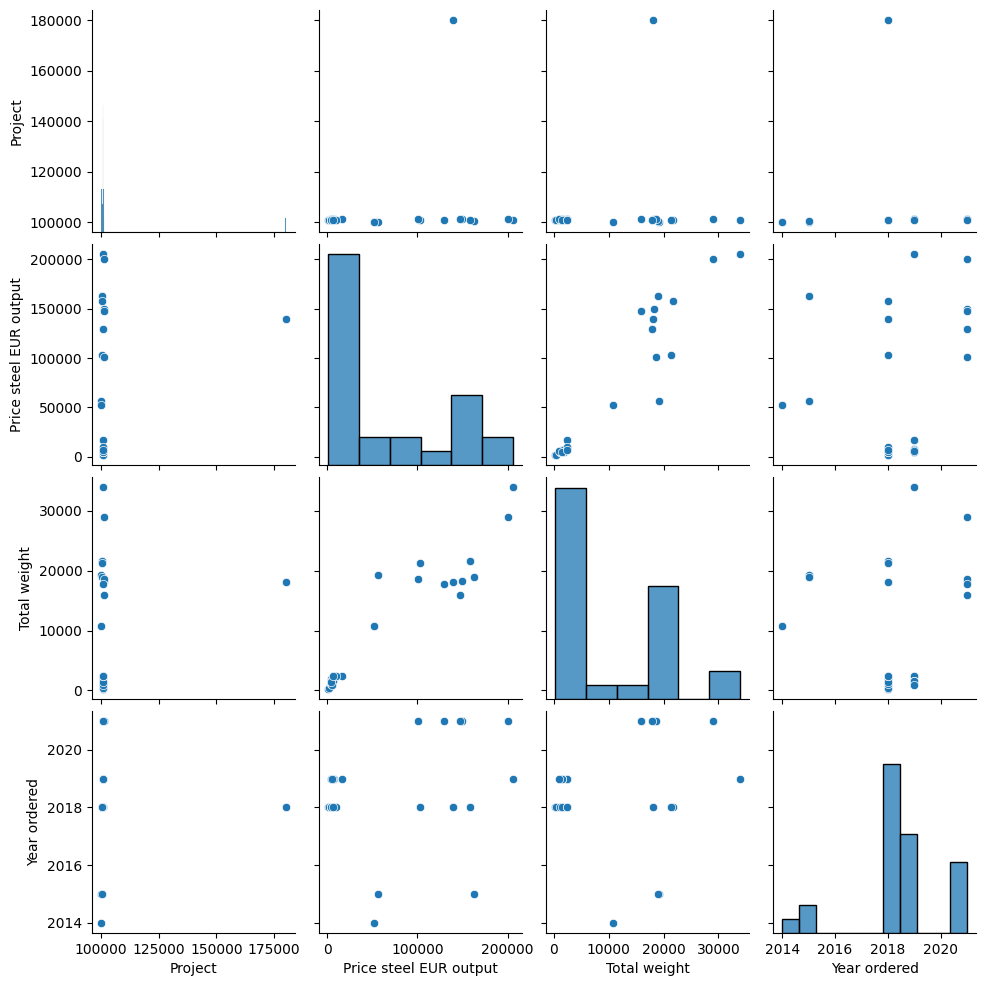

In [ ]:
sns.pairplot(df.iloc[:,[1,2,3,17]])

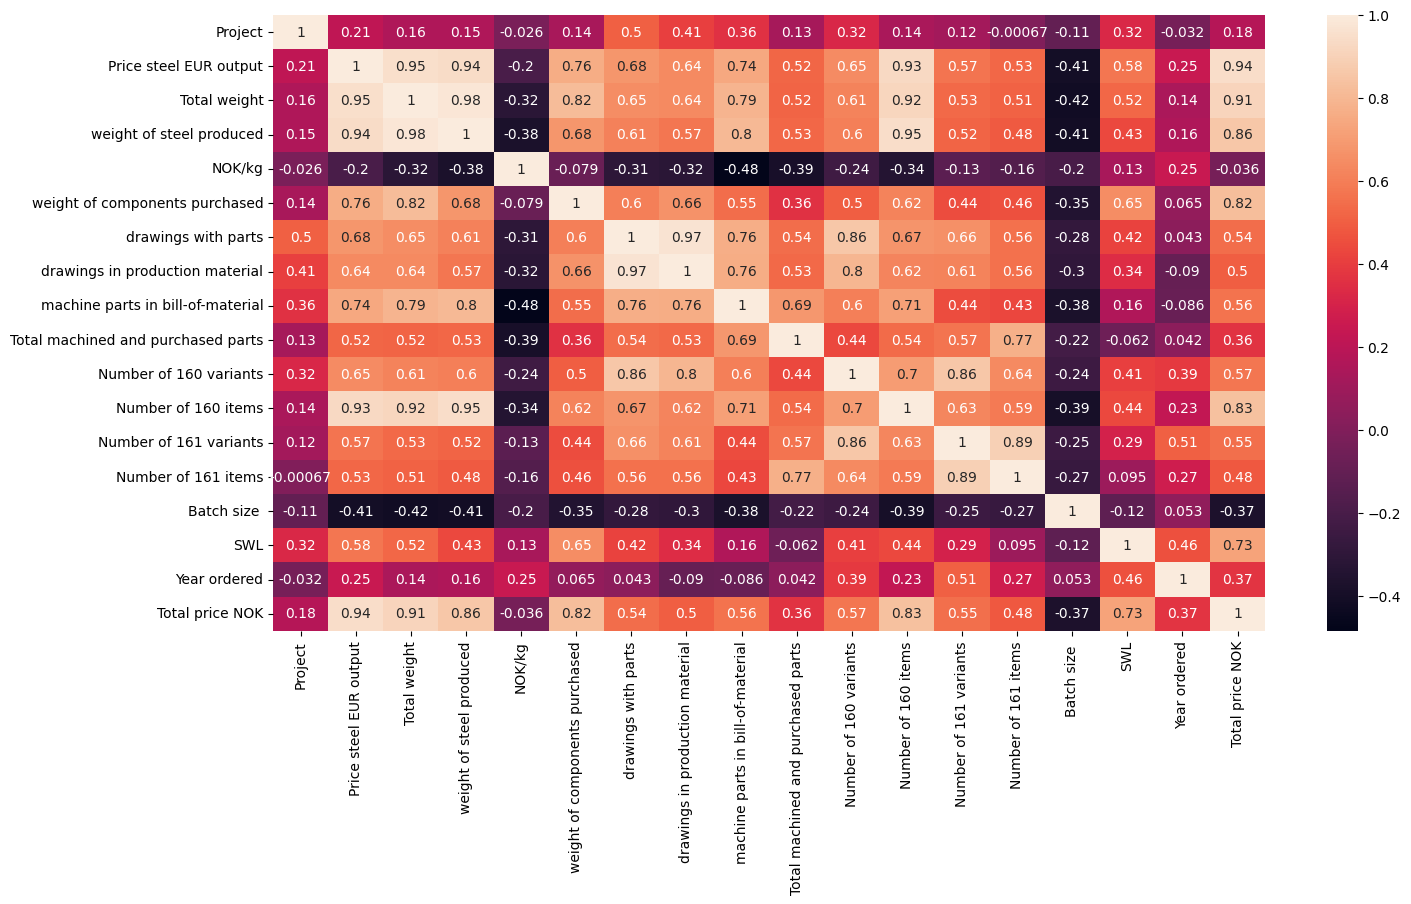

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.corr()['Total price NOK'].sort_values(ascending=False)

Total price NOK                       1.000000
Price steel EUR output                0.942934
Total weight                          0.908255
weight of steel produced              0.859561
Number of 160 items                   0.832458
weight of components purchased        0.821299
SWL                                   0.726703
Number of 160 variants                0.574080
machine parts in bill-of-material     0.560255
Number of 161 variants                0.550935
drawings with parts                   0.542498
drawings in production material       0.498589
Number of 161 items                   0.479411
Year ordered                          0.369901
Total machined and purchased parts    0.363843
Project                               0.179058
NOK/kg                               -0.035715
Batch size                           -0.368633
Name: Total price NOK, dtype: float64

In [ ]:
df.columns

Index(['Family input', 'Project', 'Price steel EUR output', 'Total weight',
       'weight of steel produced', 'NOK/kg', 'weight of components purchased',
       'drawings with parts', 'drawings in production material',
       'machine parts in bill-of-material',
       'Total machined and purchased parts', 'Number of 160 variants',
       'Number of 160 items', 'Number of 161 variants', 'Number of 161 items',
       'Batch size ', 'SWL', 'Year ordered', 'Total price NOK'],
      dtype='object')

In [ ]:
X = df.iloc[:,[0,3,4,6,12,16]]
y = df['Total price NOK']

In [ ]:
cTransformer = ColumnTransformer([('encoder',OneHotEncoder(drop='first'),[0])],remainder='passthrough')

In [ ]:
cTransformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(drop='first'), [0])])

In [ ]:
X = np.array(cTransformer.transform(X),dtype=np.float32)

In [ ]:
X.shape

(27, 11)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
def validate_result(model,model_name):
    y_pred = model.predict(X_test)
    RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('Model: ', model_name)
    print('RMSE: ',RMSE_score)

    R2_score = metrics.r2_score(y_test,y_pred)
    print('R2 Score: ',R2_score)



## XGBoost

In [ ]:
import xgboost as xgb
xgboost_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3)

In [ ]:
xgboost_reg.fit(X_train,y_train)

[10:34:02] ======== Monitor (0): HostSketchContainer ========
[10:34:02] AllReduce: 1.2e-05s, 1 calls @ 12us

[10:34:02] MakeCuts: 2.8e-05s, 1 calls @ 28us

[10:34:02] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
[10:34:02] ======== Monitor (0): Learner ========
[10:34:02] Configure: 0.002505s, 1 calls @ 2505us

[10:34:02] EvalOneIter: 0.004662s, 1000 calls @ 4662us

[10:34:02] GetGradient: 0.003123s, 1000 calls @ 3123us

[10:34:02] PredictRaw: 0.000609s, 1000 calls @ 609us

[10:34:02] UpdateOneIter: 0.158892s, 1000 calls @ 158892us

[10:34:02] ======== Monitor (0): GBTree ========
[10:34:02] BoostNewTrees: 0.149699s, 1000 calls @ 149699us

[10:34:02] CommitModel: 0.000289s, 1000 calls @ 289us

[10:34:02] ======== Monitor (0): HistUpdater ========
[10:34:02] BuildHistogram: 0.029896s, 4949 calls @ 29896us

[10:34:02] EvaluateSplits: 0.05539s, 5949 calls @ 55390us

[10:34:02] InitData: 0.005712s, 1000 calls @ 5712us

[10:34:02] InitRoot: 0.012135s, 1000 calls @ 12135us


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
validate_result(xgboost_reg,'XGBoost')

[10:34:03] DEBUG: /workspace/src/gbm/gbtree.cc:130: Using tree method: 0
Model:  XGBoost
RMSE:  298005.9769230567
R2 Score:  0.9519190640528682


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

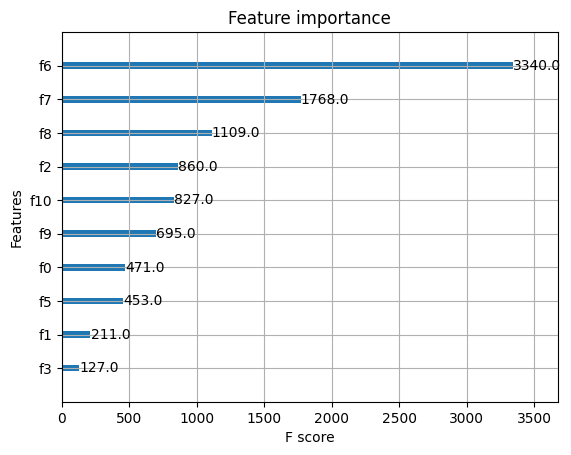

In [ ]:
xgb.plot_importance(xgboost_reg)

In [ ]:
import pickle
file = open("pickle_model.pkl","wb")
pickle.dump(xgboost_reg,file)

In [ ]:
file_tranformer = open("pickle_cTransformer.pkl","wb")
pickle.dump(cTransformer,file_tranformer)

In [ ]:
family_input = input('Enter Family Input:')
total_weight = input('Enter Total Weight:')
steel_produced_weight = input('Enter Steel Produced Weight: ')
items = input('Enter Number of 160 items:')
components_purchased_weight = input('Enter Components Purchased Weight:')
swl = input('Enter SWL:')
to_predict = [family_input, total_weight, steel_produced_weight,
                  components_purchased_weight, items, swl]
to_predict = np.array(to_predict)
to_predict = to_predict.reshape(1, 6)
to_predict = np.array(cTransformer.transform(to_predict), dtype=np.float32)
estimated_price = xgboost_reg.predict(to_predict)
print("Estimated price :",str(np.round(estimated_price[0], 2)))

Enter Family Input:To-labber
Enter Total Weight:85
Enter Steel Produced Weight: 1452
Enter Number of 160 items:5
Enter Components Purchased Weight:6
Enter SWL: 785
Estimated price : 302306.8
